# **키친솔루션 KAMP 머신러닝 강의2 소스 코드1**
## *7장 머신러닝 기초 : 사이킷런과 선형 회귀*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저서 : 으뜸 데이터 분석과 머신러닝 (개정판)
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.


### 7.1 경험을 통해서 학습하는 인간을 통해 지능을 정의해 보자

### 7.2 머신러닝의 정의와 종류를 알아보자



### 7.6 간단한 선형 회귀를 수행해 보자

In [1]:

import numpy as np
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

regr = linear_model.LinearRegression()

In [2]:
X = [[163], [179], [166], [169], [170]]
y = [54, 63, 57, 56, 58]
regr.fit(X, y)

LinearRegression()

In [3]:
coef = regr.coef_            # 직선의 기울기
intercept = regr.intercept_  # 직선의 절편
score = regr.score(X, y)     # 학습된 직선이 데이터를 얼마나 잘 따르나

print(f"y = {coef.round(2)}* X + {intercept:.2f}")
print(f"데이터와 선형회귀 직선의 관계점수: {score:.1%}")

y = [0.54]* X + -33.17
데이터와 선형회귀 직선의 관계점수: 92.2%


### 7.7 데이터를 시각화하고 차원을 증가시키자

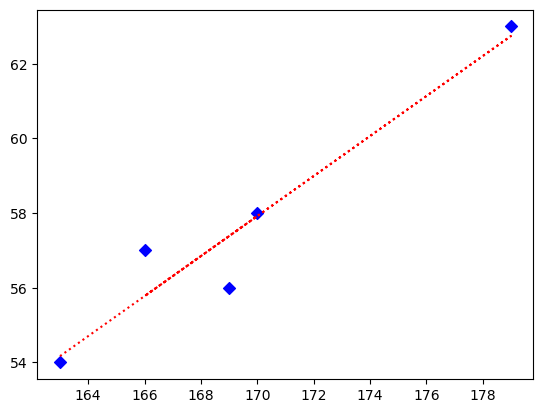

In [4]:
import matplotlib.pyplot as plt
# 학습 데이터와 y 값을 산포도로 그린다.
plt.scatter(X, y, color='blue', marker='D')
# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = regr.predict(X)
plt.plot(X, y_pred, 'r:') # 예측값을 이어주는 점선을 그려보자

In [5]:
unseen = [[167]]
result = regr.predict(unseen)
print(f'동윤이의 키가 {unseen}cm 이므로 몸무게는 {result.round(1)}kg으로 추정됨')

from sklearn.metrics import r2_score
print(f"데이터와 선형 회귀 직선의 r square 점수: {r2_score(y, y_pred):.3}")

동윤이의 키가 [[167]]cm 이므로 몸무게는 [56.3]kg으로 추정됨
데이터와 선형 회귀 직선의 r square 점수: 0.922


In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
# 남자는 0, 여자는 1
X = [[168, 0], [166, 0], [173, 0], [165, 0], [177, 0], [163, 0], \
     [178, 0], [172, 0], [163, 1], [162, 1], [171, 1], [162, 1], \
     [164, 1], [162, 1], [158, 1], [173, 1], ]    # 입력데이터를 2차원으로 만들어야 함
# y 값은 1차원 데이터
y = [65, 61, 68, 63, 68, 61, 76, 67, 55, 51, 59, 53, 61, 56, 44, 57]
regr.fit(X, y)         # 학습
print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('동윤이와 은지의 추정 몸무게 :', regr.predict([[167, 0], [167, 1]]))

계수 : [ 0.74803397 -7.23030041]
절편 : -61.227783894306384
점수 : 0.8425933302504424
동윤이와 은지의 추정 몸무게 : [63.69388959 56.46358918]


### 7.8 회귀모델의 오차 함수와 결정계수

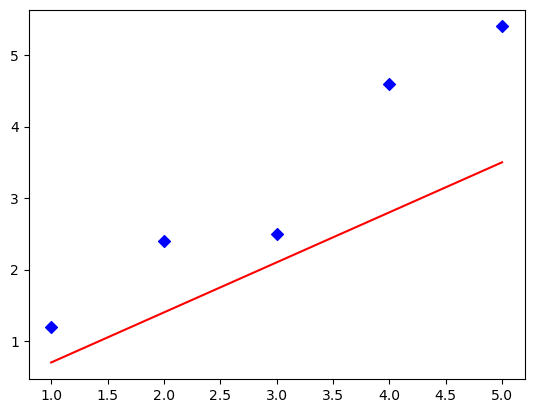

In [7]:
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5]) #
y = np.array([1.2, 2.4, 2.5, 4.6, 5.4]) # y 데이터

plt.scatter(x, y, color='blue', marker='D')
# y = 0.7x 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 0.7 * x, 'r-')

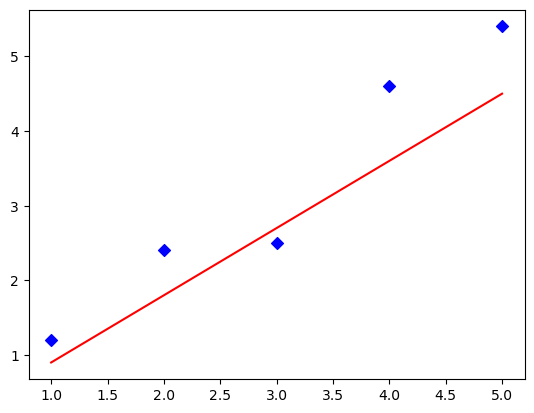

In [8]:
plt.scatter(x, y, color='blue', marker='D')
# y = 0.9x 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 0.9 * x, 'r-')

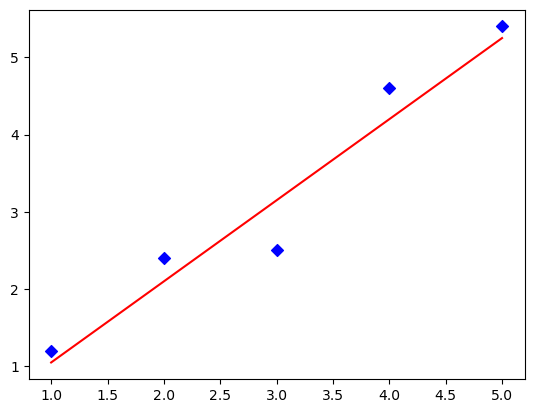

In [9]:
plt.scatter(x, y, color='blue', marker='D')
# y = 1.05x 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 1.05 * x, 'r-')

### 7.9 오차 함수의 구현과 파라미터 공간의 최적값

In [10]:
import numpy as np

y = np.array([1.2, 2.4, 2.5, 4.6, 5.4])
y_hat = np.array([1, 2, 3, 4, 5])
diff = (y_hat - y) ** 2     # y_hat과 y의 차이값의 제곱
e_mse = diff.sum() / len(y)
print('평균 제곱 오차 = ', e_mse)

평균 제곱 오차 =  0.19399999999999995


In [11]:
from sklearn.metrics import mean_squared_error

print('평균 제곱 오차 = ', mean_squared_error(y_hat, y))

평균 제곱 오차 =  0.19399999999999995


### 7.11 경사 하강법과 학습의 원리

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 0.005, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w = ', w.round(2), 'b =', b.round(2))

w =  0.63 b = -1.65


### 7.12 경사 하강법과 학습률

In [13]:
from sklearn import linear_model
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
regr = linear_model.LinearRegression()
X = X[:, np.newaxis] # 1차원 (5,)에서 2차원인 (5,1) 형태로 바꾼다
regr.fit(X, y) # X, y 데이터를 사용하여 학습시키기

print(f'w = {regr.coef_.round(2)}, b = {regr.intercept_.round(2)}')

w = [0.63], b = -1.65


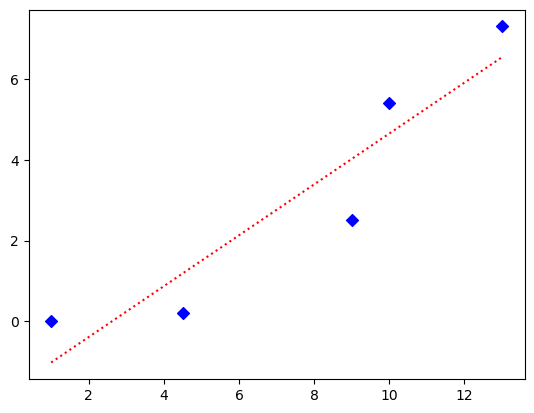

In [14]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
plt.scatter(X, y, color='blue', marker='D')
# 계산으로 구한 w, b를 이용하여 선형 회귀 직선을 그리자
y_pred = 0.63 * X - 1.65
plt.plot(X, y_pred, 'r:')

In [15]:
# 학습률이 너무 작은 경우
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 0.00001, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print(f'w = {w.round(2)}, b = {b.round(2)}')

w = 0.45, b = 0.03


In [16]:
# 학습률이 너무 큰 경우
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 1.0, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print(f'w = {w.round(2)}, b = {b.round(2)}')

w = nan, b = nan


C:\Users\user\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\user\AppData\Local\Temp\ipykernel_20604\4098245018.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - learning_rate * (error * X).sum() # 경험 E로 개선
